# 1. Data Preparation and Data Inspection

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 1.1 Mount Google Drive to Google Colab  

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1.2 Declare Directory Constants

In [0]:
dataset_folder_path = '/content/drive/My Drive/TACO-master/data/'
#the number of batches of images we have
num_batches = 7
num_of_train_batches=6
num_of_test_batches=1

In [0]:
all_training_images_paths=os.listdir(dataset_folder_path)

## 1.3 Import Required Libraries

In [0]:
import numpy as np
import scipy
import h5py
import imageio
import matplotlib.pyplot as plt
import cv2

##1.4 Data Inspection

In [0]:
print(all_training_images_paths)

['batch_4', 'batch_2', 'batch_3', 'batch_7', 'batch_6', 'batch_5', 'batch_1', 'image_anotations.txt']


In [0]:
images_in_first_batch = os.listdir(dataset_folder_path+all_training_images_paths[0])
print(images_in_first_batch)

['000090.JPG', '000094.JPG', '000031.JPG', '000095.JPG', '000000.JPG', '000002.JPG', '000003.JPG', '000004.JPG', '000005.JPG', '000006.JPG', '000007.JPG', '000008.JPG', '000009.JPG', '000010.JPG', '000011.JPG', '000012.JPG', '000013.JPG', '000014.JPG', '000015.JPG', '000016.JPG', '000018.JPG', '000019.JPG', '000020.JPG', '000021.JPG', '000022.JPG', '000023.JPG', '000025.JPG', '000026.JPG', '000027.JPG', '000028.JPG', '000029.JPG', '000032.JPG', '000034.JPG', '000035.JPG', '000036.JPG', '000037.JPG', '000039.JPG', '000040.JPG', '000041.JPG', '000042.JPG', '000043.JPG', '000045.JPG', '000046.JPG', '000047.JPG', '000048.JPG', '000049.JPG', '000050.JPG', '000051.JPG', '000052.JPG', '000053.JPG', '000054.JPG', '000055.JPG', '000056.JPG', '000057.JPG', '000058.JPG', '000059.JPG', '000060.JPG', '000061.JPG', '000062.JPG', '000063.JPG', '000064.JPG', '000065.JPG', '000066.JPG', '000067.JPG', '000068.JPG', '000069.JPG', '000070.JPG', '000071.JPG', '000072.JPG', '000073.JPG', '000074.JPG', '0000

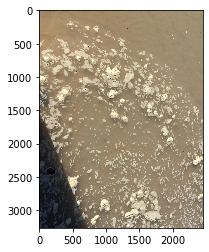

In [0]:
image = imageio.imread(dataset_folder_path+all_training_images_paths[0]+'/'+images_in_first_batch[0])
plt.imshow(image)

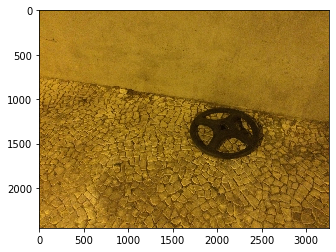

In [0]:
image = imageio.imread(dataset_folder_path+all_training_images_paths[0]+'/'+images_in_first_batch[1])
plt.imshow(image)

## 1.5 Compress all images to a single HDF5 File for easier access

In [0]:
WIDTH=512
HEIGHT=512
CHANNELS=3

# !!!!!No Need to run the cell below again as running it again will recreate the Hdf5 file from scratch and waste your 5-10 minutes!!!!!!

In [0]:
import datetime as dt
import matplotlib.pylab as plb
start = dt.datetime.now()
hdf5_path = '/content/drive/My Drive/TACO-master/dataset.hdf5'

In [0]:
m=0
with h5py.File(hdf5_path, 'w') as hf:
  for i in all_training_images_paths:
    for j in os.listdir(dataset_folder_path+i):
      print(dataset_folder_path+i+'/'+j)
      image = cv2.imread(dataset_folder_path+i+'/'+j)
      image = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
      file_name=i+'_'+j;
      file_name.replace('.JPG', '')
      Xset = hf.create_dataset(
                name=file_name,
                data=image,
                shape=(HEIGHT, WIDTH, CHANNELS),
                maxshape=(HEIGHT, WIDTH, CHANNELS),
                compression="gzip",
                compression_opts=9)
      end=dt.datetime.now()
      print("\r", i, ": ", (end-start).seconds, "seconds", end="")


/content/drive/My Drive/TACO-master/data/batch_4/000090.JPG
 batch_4 :  2 seconds/content/drive/My Drive/TACO-master/data/batch_4/000094.JPG
 batch_4 :  2 seconds/content/drive/My Drive/TACO-master/data/batch_4/000031.JPG
 batch_4 :  3 seconds/content/drive/My Drive/TACO-master/data/batch_4/000095.JPG
 batch_4 :  4 seconds/content/drive/My Drive/TACO-master/data/batch_4/000000.JPG
 batch_4 :  5 seconds/content/drive/My Drive/TACO-master/data/batch_4/000002.JPG
 batch_4 :  6 seconds/content/drive/My Drive/TACO-master/data/batch_4/000003.JPG
 batch_4 :  6 seconds/content/drive/My Drive/TACO-master/data/batch_4/000004.JPG
 batch_4 :  7 seconds/content/drive/My Drive/TACO-master/data/batch_4/000005.JPG
 batch_4 :  8 seconds/content/drive/My Drive/TACO-master/data/batch_4/000006.JPG
 batch_4 :  9 seconds/content/drive/My Drive/TACO-master/data/batch_4/000007.JPG
 batch_4 :  10 seconds/content/drive/My Drive/TACO-master/data/batch_4/000008.JPG
 batch_4 :  10 seconds/content/drive/My Drive/TA

##1.5.1 Load back the data from the hdf5 file

batch_1_000000.jpg
batch_1_000001.jpg
batch_1_000003.jpg
batch_1_000004.jpg
batch_1_000005.jpg


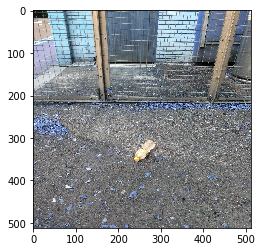

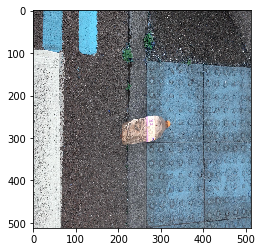

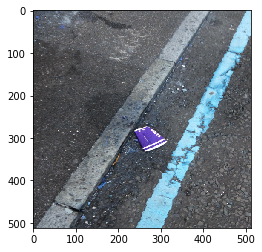

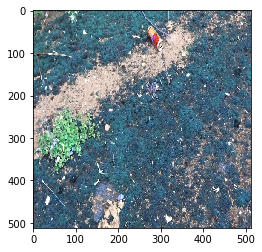

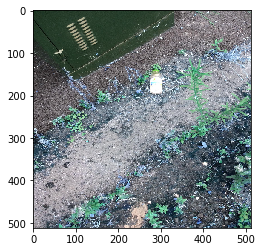

In [0]:
hf = h5py.File(hdf5_path, 'r')
file_names=list(hf.keys())
for i in range(5):
  plt.figure()
  print(file_names[i])
  plt.imshow(hf[file_names[i]])

## 1.6 Get Annotations from the Json file and store them to an Array

# !!!!The code below isn't very efficient. It will take 1-2 minutes to run so give it some time !!!!!

In [0]:
import json

In [0]:
annotations_path = '/content/drive/My Drive/TACO-master/annotations.json'

In [0]:
def get_objects_in_image(image_id):
  with open(annotations_path) as json_file:
    data=json.load(json_file)
    objects=[]
    for item in data['annotations']:
      if item['image_id']==image_id:
        objects.append(item['image_id'])
        objects.append(item['category_id'])
        objects=objects+item['bbox']
    return objects

In [0]:
def split_list(a_list):
  a=0
  temp=[]
  return_string=[]
  length=len(a_list)
  for i in range(int(length/6)):
    return_string.append(a_list[a:a+6])
    a=a+6
  return return_string

In [0]:
objects=[]
with open(annotations_path) as json_file:
  data=json.load(json_file)
  for i in data['images']:
    objects.append(get_objects_in_image(i['id']))

#!!!!Run the cell below multiple times (maybe >5) until no output is produced. Fix coming soon, Vivek is lazy :-P

In [0]:
for i in objects:
    if(len(i)>6):
      print(i)
      objects.remove(i)
      for split in split_list(i):
        objects.append(split)

In [0]:
for i in objects:
  if len(i)>6:
    print(i)

In [0]:
print(objects)

[[0, 6, 517.0, 600.0, 447.0, 1322.0], [4, 12, 556.0, 769.0, 490.0, 336.0], [6, 11, 515.0, 485.0, 357.0, 1125.0], [8, 5, 824.0, 1256.0, 89.0, 236.0], [14, 4, 419.0, 187.0, 713.0, 1854.0], [17, 20, 714.0, 719.0, 234.0, 237.0], [18, 12, 522.0, 759.0, 240.0, 122.0], [24, 11, 274.0, 480.0, 663.0, 846.0], [29, 12, 668.0, 677.0, 455.0, 655.0], [31, 12, 604.0, 677.0, 187.0, 320.0], [32, 12, 470.0, 688.0, 413.0, 321.0], [36, 5, 710.0, 626.0, 153.0, 198.0], [37, 6, 811.0, 576.0, 199.0, 350.0], [39, 6, 593.0, 877.0, 432.0, 238.0], [40, 6, 713.0, 1146.0, 191.0, 373.0], [42, 12, 652.0, 486.0, 425.0, 689.0], [48, 15, 413.0, 406.0, 1143.0, 922.0], [49, 15, 31.0, 963.0, 1700.0, 2107.0], [51, 12, 1050.0, 1257.0, 410.0, 353.0], [52, 12, 1038.0, 1516.0, 255.0, 637.0], [53, 14, 1024.0, 1275.0, 556.0, 592.0], [55, 12, 940.0, 1716.0, 492.0, 711.0], [58, 34, 421.0, 309.0, 1362.0, 1946.0], [59, 34, 257.0, 394.0, 1712.0, 1781.0], [61, 42, 966.0, 1380.0, 525.0, 485.0], [71, 43, 1278.0, 769.0, 602.0, 654.0], [74

In [0]:
print(len(objects))

2152


In [0]:
image_annotations = []
for image in objects:
  for image_names in data['images']:
    if image_names['id']==image[0]:
      image.insert(0, image_names['file_name'])
      image_annotations.append(image)  

In [0]:
print(len(image_annotations))
print(image_annotations)

2152
[['batch_1/000006.jpg', 0, 6, 517.0, 600.0, 447.0, 1322.0], ['batch_1/000026.jpg', 4, 12, 556.0, 769.0, 490.0, 336.0], ['batch_1/000055.jpg', 6, 11, 515.0, 485.0, 357.0, 1125.0], ['batch_1/000005.jpg', 8, 5, 824.0, 1256.0, 89.0, 236.0], ['batch_1/000056.jpg', 14, 4, 419.0, 187.0, 713.0, 1854.0], ['batch_1/000003.jpg', 17, 20, 714.0, 719.0, 234.0, 237.0], ['batch_1/000011.jpg', 18, 12, 522.0, 759.0, 240.0, 122.0], ['batch_1/000061.jpg', 24, 11, 274.0, 480.0, 663.0, 846.0], ['batch_1/000027.jpg', 29, 12, 668.0, 677.0, 455.0, 655.0], ['batch_1/000030.jpg', 31, 12, 604.0, 677.0, 187.0, 320.0], ['batch_1/000031.jpg', 32, 12, 470.0, 688.0, 413.0, 321.0], ['batch_1/000000.jpg', 36, 5, 710.0, 626.0, 153.0, 198.0], ['batch_1/000013.jpg', 37, 6, 811.0, 576.0, 199.0, 350.0], ['batch_1/000016.jpg', 39, 6, 593.0, 877.0, 432.0, 238.0], ['batch_1/000017.jpg', 40, 6, 713.0, 1146.0, 191.0, 373.0], ['batch_1/000029.jpg', 42, 12, 652.0, 486.0, 425.0, 689.0], ['batch_1/000066.JPG', 48, 15, 413.0, 406

In [0]:
with open(dataset_folder_path+'image_anotations.txt', "w") as output:
    output.write(str(image_annotations))

In [0]:
json_file = open(annotations_path)
data=json.load(json_file)
print(len(data['categories']))

60


# 2.0 Model Building for Image Classification

## 2.1 Linear Regression

In [0]:
print(image_annotations)

[['batch_1/000006.jpg', 0, 6, 517.0, 600.0, 447.0, 1322.0], ['batch_1/000026.jpg', 4, 12, 556.0, 769.0, 490.0, 336.0], ['batch_1/000055.jpg', 6, 11, 515.0, 485.0, 357.0, 1125.0], ['batch_1/000005.jpg', 8, 5, 824.0, 1256.0, 89.0, 236.0], ['batch_1/000056.jpg', 14, 4, 419.0, 187.0, 713.0, 1854.0], ['batch_1/000003.jpg', 17, 20, 714.0, 719.0, 234.0, 237.0], ['batch_1/000011.jpg', 18, 12, 522.0, 759.0, 240.0, 122.0], ['batch_1/000061.jpg', 24, 11, 274.0, 480.0, 663.0, 846.0], ['batch_1/000027.jpg', 29, 12, 668.0, 677.0, 455.0, 655.0], ['batch_1/000030.jpg', 31, 12, 604.0, 677.0, 187.0, 320.0], ['batch_1/000031.jpg', 32, 12, 470.0, 688.0, 413.0, 321.0], ['batch_1/000000.jpg', 36, 5, 710.0, 626.0, 153.0, 198.0], ['batch_1/000013.jpg', 37, 6, 811.0, 576.0, 199.0, 350.0], ['batch_1/000016.jpg', 39, 6, 593.0, 877.0, 432.0, 238.0], ['batch_1/000017.jpg', 40, 6, 713.0, 1146.0, 191.0, 373.0], ['batch_1/000029.jpg', 42, 12, 652.0, 486.0, 425.0, 689.0], ['batch_1/000066.JPG', 48, 15, 413.0, 406.0, 1

In [0]:
print(list(h5py.File(hdf5_path, 'r').keys()))

['batch_1_000000.jpg', 'batch_1_000001.jpg', 'batch_1_000003.jpg', 'batch_1_000004.jpg', 'batch_1_000005.jpg', 'batch_1_000006.jpg', 'batch_1_000007.jpg', 'batch_1_000008.jpg', 'batch_1_000010.jpg', 'batch_1_000011.jpg', 'batch_1_000012.jpg', 'batch_1_000013.jpg', 'batch_1_000014.jpg', 'batch_1_000015.jpg', 'batch_1_000016.jpg', 'batch_1_000017.jpg', 'batch_1_000019.jpg', 'batch_1_000021.jpg', 'batch_1_000022.jpg', 'batch_1_000023.jpg', 'batch_1_000024.jpg', 'batch_1_000025.jpg', 'batch_1_000026.jpg', 'batch_1_000027.jpg', 'batch_1_000028.jpg', 'batch_1_000029.jpg', 'batch_1_000030.jpg', 'batch_1_000031.jpg', 'batch_1_000032.jpg', 'batch_1_000035.jpg', 'batch_1_000037.jpg', 'batch_1_000038.jpg', 'batch_1_000040.jpg', 'batch_1_000042.jpg', 'batch_1_000043.jpg', 'batch_1_000045.jpg', 'batch_1_000047.jpg', 'batch_1_000048.jpg', 'batch_1_000049.jpg', 'batch_1_000050.jpg', 'batch_1_000053.jpg', 'batch_1_000054.jpg', 'batch_1_000055.jpg', 'batch_1_000056.jpg', 'batch_1_000058.jpg', 'batch_1_

In [0]:
def replacer(s, newstring, index, nofail=False):
    # raise an error if index is outside of the string
    if not nofail and index not in range(len(s)):
        raise ValueError("index outside given string")

    # if not erroring, but the index is still not in the correct range..
    if index < 0:  # add it to the beginning
        return newstring + s
    if index > len(s):  # add it to the end
        return s + newstring

    # insert the new string between "slices" of the original
    return s[:index] + newstring + s[index + 1:]

In [0]:
hf = h5py.File(hdf5_path, 'r')
file_names=list(hf.keys())
print(file_names)

images=[]
for i in image_annotations:
  for j in file_names:
    k=replacer(i[0], '_', 7)
    if k==j:
      images.append(hf[j].value)

['batch_1_000000.jpg', 'batch_1_000001.jpg', 'batch_1_000003.jpg', 'batch_1_000004.jpg', 'batch_1_000005.jpg', 'batch_1_000006.jpg', 'batch_1_000007.jpg', 'batch_1_000008.jpg', 'batch_1_000010.jpg', 'batch_1_000011.jpg', 'batch_1_000012.jpg', 'batch_1_000013.jpg', 'batch_1_000014.jpg', 'batch_1_000015.jpg', 'batch_1_000016.jpg', 'batch_1_000017.jpg', 'batch_1_000019.jpg', 'batch_1_000021.jpg', 'batch_1_000022.jpg', 'batch_1_000023.jpg', 'batch_1_000024.jpg', 'batch_1_000025.jpg', 'batch_1_000026.jpg', 'batch_1_000027.jpg', 'batch_1_000028.jpg', 'batch_1_000029.jpg', 'batch_1_000030.jpg', 'batch_1_000031.jpg', 'batch_1_000032.jpg', 'batch_1_000035.jpg', 'batch_1_000037.jpg', 'batch_1_000038.jpg', 'batch_1_000040.jpg', 'batch_1_000042.jpg', 'batch_1_000043.jpg', 'batch_1_000045.jpg', 'batch_1_000047.jpg', 'batch_1_000048.jpg', 'batch_1_000049.jpg', 'batch_1_000050.jpg', 'batch_1_000053.jpg', 'batch_1_000054.jpg', 'batch_1_000055.jpg', 'batch_1_000056.jpg', 'batch_1_000058.jpg', 'batch_1_

In [0]:
print(len(images))
print(len(image_annotations))

2152
2152


In [0]:
image_annotations_2 = []
for i in image_annotations:
  image_annotations_2.append(i[2])

In [0]:
print(image_annotations_2)

[6, 12, 11, 5, 4, 20, 12, 11, 12, 12, 12, 5, 6, 6, 6, 12, 15, 15, 12, 12, 14, 12, 34, 34, 42, 43, 38, 22, 22, 36, 42, 25, 8, 12, 42, 18, 14, 42, 32, 5, 5, 39, 46, 21, 12, 27, 42, 39, 39, 58, 29, 8, 8, 33, 39, 14, 42, 55, 7, 14, 55, 39, 36, 36, 39, 39, 7, 42, 42, 18, 40, 12, 12, 42, 42, 6, 5, 14, 39, 36, 50, 18, 21, 12, 12, 20, 14, 36, 36, 43, 40, 2, 4, 8, 0, 5, 36, 40, 7, 36, 20, 36, 39, 55, 7, 7, 29, 36, 55, 29, 29, 7, 36, 29, 29, 29, 36, 29, 29, 7, 36, 24, 29, 57, 29, 51, 21, 21, 51, 33, 55, 51, 36, 29, 0, 0, 36, 36, 51, 29, 29, 29, 29, 7, 7, 36, 51, 29, 8, 8, 31, 57, 7, 36, 36, 36, 17, 57, 36, 45, 39, 55, 39, 7, 55, 51, 55, 36, 52, 36, 29, 45, 7, 57, 7, 21, 21, 14, 45, 36, 55, 29, 6, 36, 36, 36, 33, 22, 12, 5, 12, 57, 48, 36, 36, 34, 21, 21, 39, 27, 29, 42, 10, 5, 5, 46, 42, 36, 21, 0, 14, 39, 36, 0, 5, 45, 0, 0, 5, 51, 17, 7, 44, 46, 36, 5, 0, 21, 5, 29, 45, 12, 12, 21, 36, 17, 5, 39, 46, 49, 5, 17, 20, 36, 39, 8, 36, 49, 12, 36, 0, 5, 5, 45, 57, 21, 8, 16, 36, 43, 21, 39, 39, 36, 

In [0]:
import tensorflow as tf
inputs = tf.keras.layers.Input((512, 512, 3)) #512*512*3=786432
x = tf.keras.layers.Flatten()(inputs)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=inputs, outputs=output)
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_absolute_error', optimizer=sgd, metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Don't know if this is working properly, Ask Maeel and Alex, Also, ask how to train model on all 5 training attributes

In [0]:
model.fit(np.array(images), np.array(image_annotations_2), verbose=1)

Train on 2152 samples
2152/2152 [==============================] - 5s 2ms/sample - loss: 32.0967 - acc: 4.6468e-04


In [0]:
a=model.predict(np.array(images))

In [0]:
print(a[0:30])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## 2.2 VGG 19

In [0]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False)
vgg19.compile(loss=tf.keras.losses.binary_crossentropy)

In [0]:
vgg19.fit(np.array(images), np.array(image_annotations_2), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2152 samples


InvalidArgumentError: ignored